#Import thư viện

In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import cv2
import math
import os
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from skimage import feature, exposure
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#Đọc dữ liệu 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/DS102/PETDATASET.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: data/test/dog/2005.jpg  
  inflating: data/test/dog/2006.jpg  
  inflating: data/test/dog/2007.jpg  
  inflating: data/test/dog/2008.jpg  
  inflating: data/test/dog/2009.jpg  
  inflating: data/test/dog/2010.jpg  
  inflating: data/test/dog/2011.jpg  
  inflating: data/test/dog/2012.jpg  
  inflating: data/test/dog/2013.jpg  
  inflating: data/test/dog/2014.jpg  
  inflating: data/test/dog/2015.jpg  
  inflating: data/test/dog/2016.jpg  
  inflating: data/test/dog/2017.jpg  
  inflating: data/test/dog/2018.jpg  
  inflating: data/test/dog/2019.jpg  
  inflating: data/test/dog/2020.jpg  
  inflating: data/test/dog/2021.jpg  
  inflating: data/test/dog/2022.jpg  
  inflating: data/test/dog/2023.jpg  
  inflating: data/test/dog/2024.jpg  
  inflating: data/test/dog/2025.jpg  
  inflating: data/test/dog/2026.jpg  
  inflating: data/test/dog/2027.jpg  
  inflating: data/test/dog/2028.jpg  
  inflating: data/test/dog/2029

In [ ]:
train_images = []
train_labels = []
types = os.listdir('data/train')
mappings =  {'bird':0, 'bunny':1, 'cat':2, 'dog':3}
for t in types:
    images = os.listdir('data/train/' +'/'+ t)
    for img_path in images:
        img = Image.open('data/train/' + '/' + t + '/' + img_path)
        train_images.append(img)
        train_labels.append(mappings[t])

In [ ]:
test_images = []
test_labels = []
types = os.listdir('data/test')
mappings =  {'bird':0, 'bunny':1, 'cat':2, 'dog':3}
for t in types:
    images = os.listdir('data/test' +'/'+ t)
    for img_path in images:
        img = Image.open('data/test' + '/' + t + '/' + img_path)
        test_images.append(img)
        test_labels.append(mappings[t])

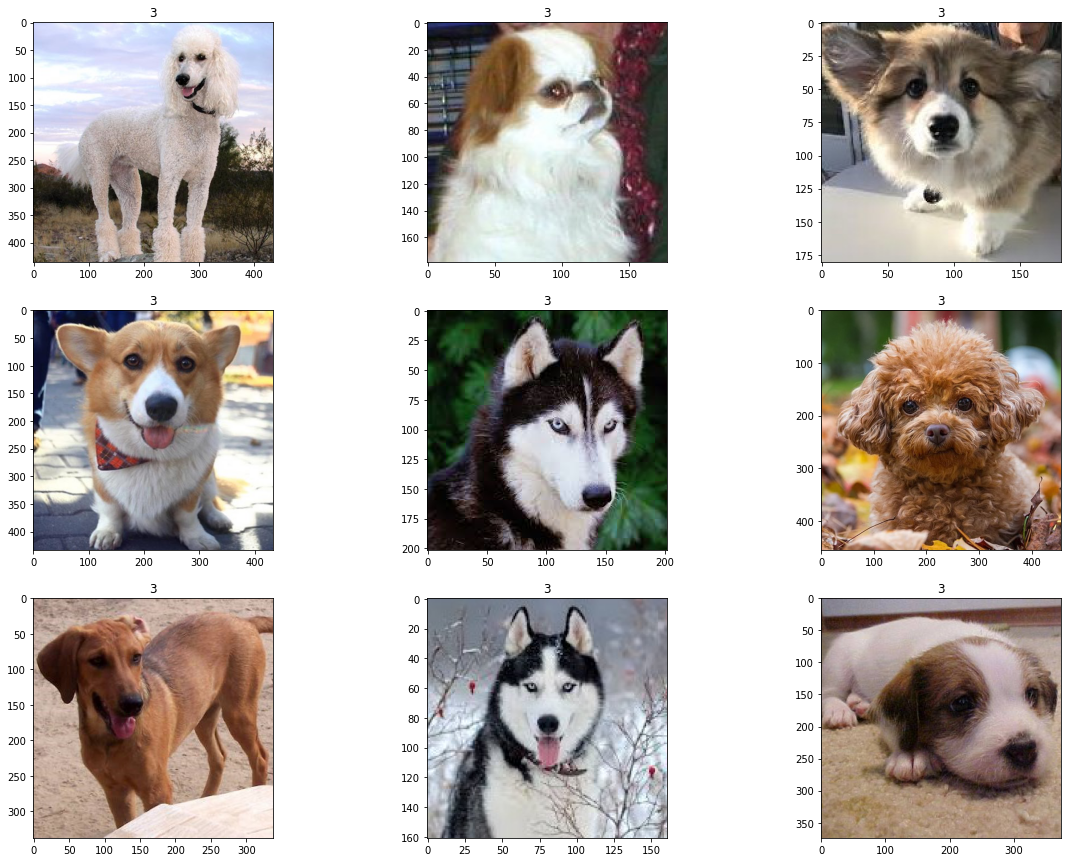

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.title('%s' %train_labels[i])
  plt.imshow(train_images[i])
plt.show()

#Xử lý ảnh 

tập train_images

In [ ]:
image = []
hog = []
pixel=128   
for i in range(4800):
  img=train_images[i]
  img=img.resize((pixel,pixel))
  img=img.convert('L')
  img=np.asarray(img)
  img = cv2.equalizeHist(img)
  (img, H)= feature.hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2", visualize= True)
  hogImage = exposure.rescale_intensity(H, out_range=(0, 255))
  hogImage = hogImage.astype("uint8")
  hog.append(hogImage)
  image.append(img)

tập test_images

In [ ]:
image1 = []
pixel=128   
for i in range(1200):
  img=test_images[i]
  img=img.resize((pixel,pixel))
  img=img.convert('L')
  img=np.asarray(img)
  img = cv2.equalizeHist(img)
  (img, H)= feature.hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2", visualize= True)
  hogImage = exposure.rescale_intensity(H, out_range=(0, 255))
  hogImage = hogImage.astype("uint8")
  hog.append(hogImage)
  image1.append(img)

Trực quan 1 số hình ảnh sau xử lý 

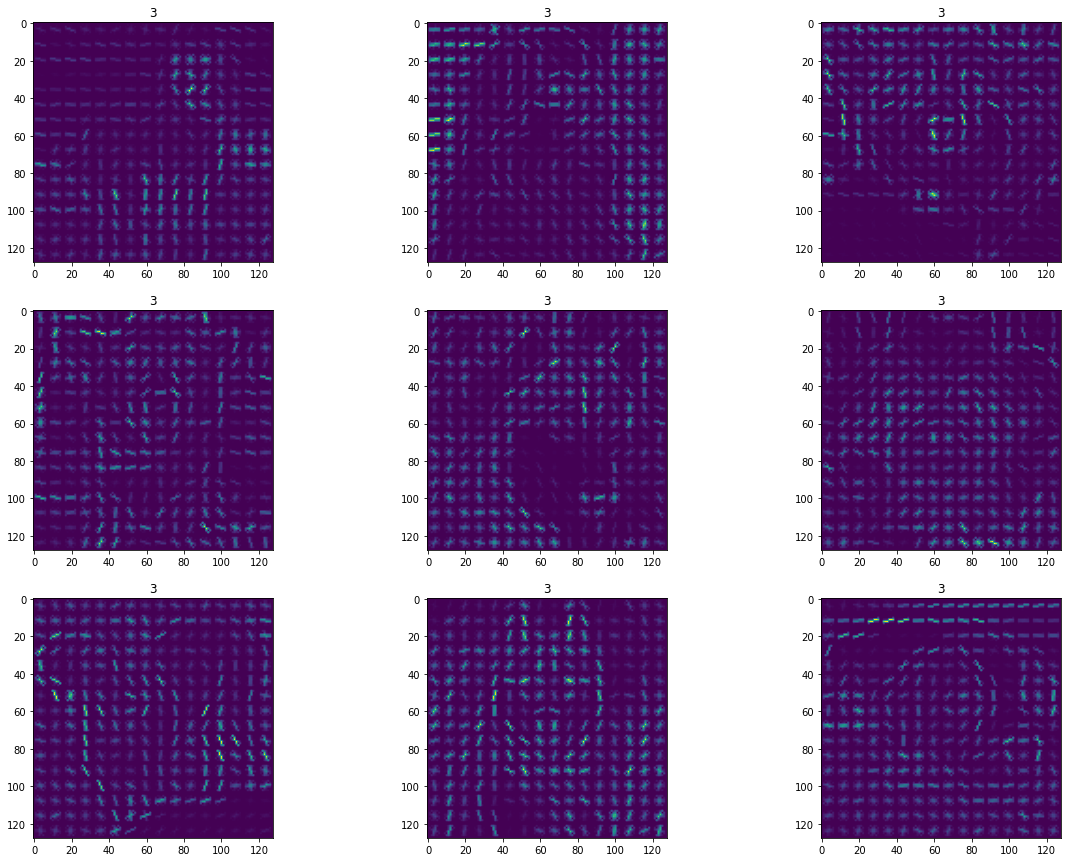

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.title('%s' %train_labels[i])
  plt.imshow(hog[i])
plt.show()

Gán dữ liệu cho các biến độc lập và biến phụ thuộc X,Y

In [ ]:
X_train = np.asarray(image)
X_test = np.asarray(image1)
Y_train = train_labels
Y_test = test_labels

Convert Y_train, Y_test từ String sang Numberic

In [ ]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

#LogisticRegression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)


Test_Accuracy_score= model_lr.score(X_test, Y_test)

print("accuracy score in test =%.2f%%\n" % (Test_Accuracy_score*100))

y_pred = model_lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred, digits=4))

accuracy score in test =61.92%

              precision    recall  f1-score   support

           0     0.7297    0.7200    0.7248       300
           1     0.6141    0.6100    0.6120       300
           2     0.5779    0.5933    0.5855       300
           3     0.5570    0.5533    0.5552       300

    accuracy                         0.6192      1200
   macro avg     0.6197    0.6192    0.6194      1200
weighted avg     0.6197    0.6192    0.6194      1200



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,




Tìm tham số hợp lý cho Logistic RegressionRegression

In [ ]:
#Tuning hyparameters of Logistic Regression
grid_param = {"C": [0.0001,0.001,0.01,0.1,1], "penalty": ['l1', 'l2']}
lr_grid = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), param_grid=grid_param, cv= 5,scoring='f1_macro')

lr_grid.fit(X_train, Y_train)

print(lr_grid.best_params_)
print(lr_grid.best_score_)

{'C': 0.0001, 'penalty': 'l2'}
0.6687512498334109


Chạy model với tham số tìm được

In [ ]:
model_lr_grid = LogisticRegression(solver='liblinear', C=0.0001)
model_lr_grid.fit(X_train, Y_train)

Test_Accuracy_score= model_lr_grid.score(X_test, Y_test)

print("accuracy score in test =%.2f%%\n" % (Test_Accuracy_score*100))

y_pred = model_lr_grid.predict(X_test)
print(classification_report(Y_test, y_pred, digits=4))

accuracy score in test =65.25%

              precision    recall  f1-score   support

           0     0.7033    0.7900    0.7441       300
           1     0.6419    0.6333    0.6376       300
           2     0.6285    0.6033    0.6156       300
           3     0.6272    0.5833    0.6045       300

    accuracy                         0.6525      1200
   macro avg     0.6502    0.6525    0.6505      1200
weighted avg     0.6502    0.6525    0.6505      1200



#Support Vector Machine

In [18]:
model_svc = SVC()
model_svc.fit(X_train, Y_train)

Test_Accuracy_score= model_svc.score(X_test, Y_test)

print("accuracy score in test =%.2f%%\n" % (Test_Accuracy_score*100))
# print prediction results
y_pred = model_svc.predict(X_test)
print(classification_report(Y_test, y_pred, digits=4))

accuracy score in test =70.33%

              precision    recall  f1-score   support

           0     0.7908    0.8067    0.7987       300
           1     0.7010    0.6800    0.6904       300
           2     0.6623    0.6667    0.6645       300
           3     0.6578    0.6600    0.6589       300

    accuracy                         0.7033      1200
   macro avg     0.7030    0.7033    0.7031      1200
weighted avg     0.7030    0.7033    0.7031      1200



Tìm tham số hợp lý cho Support Vector Machine

In [ ]:
#Tuning hyparameters of SVC
grid_param = {'C': [0.0001,0.01,0.1,1],
             'gamma': [1, 0.1, 0.001, 0.0001],
             'kernel': ['linear', 'rbf']}

SVM_grid = GridSearchCV(estimator=SVC(), 
                     param_grid=grid_param, 
                     cv=5, 
                     scoring='f1_macro')

SVM_grid.fit(X_train, Y_train)

print(SVM_grid.best_params_)

#print(SVM_grid.best_score_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


Chạy model với tham số tìm được

In [ ]:
model_svc_grid = SVC(C=1, gamma=0.0001, kernel= 'rbf')
model_svc_grid.fit(X_train, Y_train)

Test_Accuracy_score= model_svc_grid.score(X_test, Y_test)

print("accuracy score in test =%.2f%%\n" % (Test_Accuracy_score*100))

y_pred = model_svc_grid.predict(X_test)
print(classification_report(Y_test, y_pred, digits=4))

accuracy score in test =69.67%

              precision    recall  f1-score   support

           0     0.7993    0.7967    0.7980       300
           1     0.6849    0.6667    0.6757       300
           2     0.6601    0.6667    0.6633       300
           3     0.6438    0.6567    0.6502       300

    accuracy                         0.6967      1200
   macro avg     0.6970    0.6967    0.6968      1200
weighted avg     0.6970    0.6967    0.6968      1200



#KNN


In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

Test_Accuracy_score= model_knn.score(X_test, Y_test)

print("accuracy score in test =%.2f%%\n" % (Test_Accuracy_score*100))

y_pred = model_knn.predict(X_test)
print(classification_report(Y_test, y_pred, digits=4))

accuracy score in test =38.67%

              precision    recall  f1-score   support

           0     0.9110    0.4433    0.5964       300
           1     0.2914    0.9567    0.4467       300
           2     0.5778    0.0867    0.1507       300
           3     0.7500    0.0600    0.1111       300

    accuracy                         0.3867      1200
   macro avg     0.6325    0.3867    0.3262      1200
weighted avg     0.6325    0.3867    0.3262      1200



Tìm tham số hợp lý cho KNN

In [ ]:
#Tuning hyparameters of KNN
grid_param = {'n_neighbors': list(range(1,10)), 'p': [1, 2]}

KNN_grid = GridSearchCV(estimator= KNeighborsClassifier(), 
                     param_grid=grid_param, 
                     cv=5, 
                     scoring='f1_macro')

KNN_grid.fit(X_train, Y_train)

print(KNN_grid.best_params_)

{'n_neighbors': 1, 'p': 1}


Chạy model với tham số tìm được

In [ ]:
model_knn_grid = KNeighborsClassifier(n_neighbors=1, p=1)
model_knn_grid.fit(X_train, Y_train)

Test_Accuracy_score= model_knn_grid.score(X_test, Y_test)

print("accuracy score in test =%.2f%%\n" % (Test_Accuracy_score*100))

y_pred = model_knn_grid.predict(X_test)
print(classification_report(Y_test, y_pred, digits=4))

accuracy score in test =65.25%

              precision    recall  f1-score   support

           0     0.8198    0.7733    0.7959       300
           1     0.5160    0.8600    0.6450       300
           2     0.6878    0.5433    0.6071       300
           3     0.7222    0.4333    0.5417       300

    accuracy                         0.6525      1200
   macro avg     0.6864    0.6525    0.6474      1200
weighted avg     0.6864    0.6525    0.6474      1200



#Confusion_matrix cho Support Vector Machine

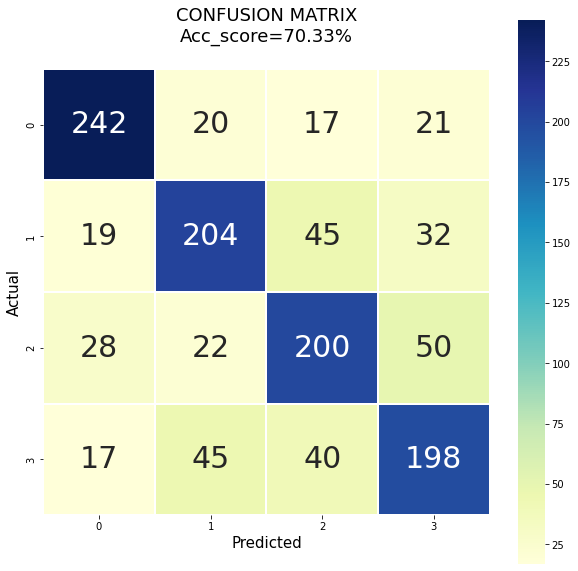

In [ ]:
cm=confusion_matrix(Y_test,model_svc.predict(X_test))

import seaborn as sns
plt.figure(figsize=(10,10))
plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'YlGnBu', annot_kws={'size':30},fmt='d')
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)
##plt.suptitle('CONFUSION MATRIX',size=18)
Test_Accuracy_score= model_svc.score(X_test, Y_test)
plt.title('CONFUSION MATRIX\nAcc_score=%.2f%%\n' %(Test_Accuracy_score*100),size=18)

#plt.savefig("CONFUSION MATRIX.png")
plt.show()

#demo


In [16]:
def demo(model):
  val = random.randint(0, 1190)
  print("Ảnh đầu vào:")
  plt.imshow(test_images[val])
  plt.show()
  img = X_test[val]
  img = img.reshape(1,-1)
  y_pred = model.predict(img)
  if(y_pred[0]==0):
    print("\nNhãn dự đoán: chim")
  if(y_pred[0]==1):
    print("\nNhãn dự đoán: thỏ")
  if(y_pred[0]==2):
    print("\nNhãn dự đoán: mèo")
  if(y_pred[0]==3):
    print("\nNhãn dự đoán: chó")

Ảnh đầu vào:


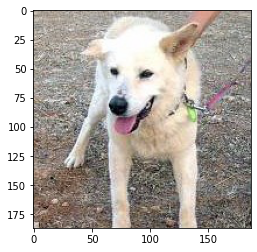


Nhãn dự đoán: chó


In [21]:
demo(model_svc)